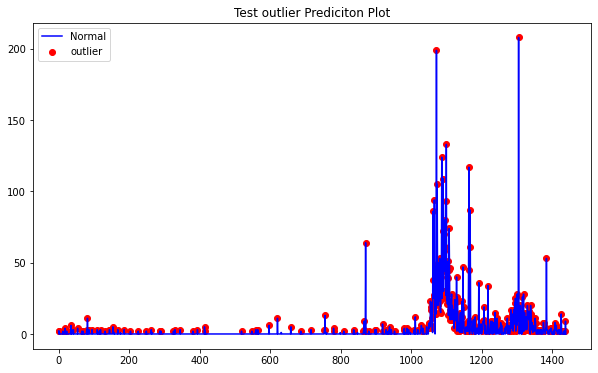

In [1]:
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('assignment_data.csv')

x_train = data.iloc[:8640]['variable']
train_ids = data.iloc[:8640]['ID']
x_test = data.iloc[8640:]['variable']
test_ids = data.iloc[8640:]['ID']

model = pickle.load(open('IForestOutlierDetection.sav', 'rb'))
scaler = pickle.load(open('scaler.sav','rb'))

def finalOutlierDetection(dataArray):
    
    df = pd.DataFrame(data=dataArray,columns=['variable'])
    dataScaled = scaler.fit_transform(df.values.reshape(-1, 1))
    df['outlier'] = model.predict(dataScaled)
    
    fig, ax = plt.subplots(figsize=(10,6))
    b = df.loc[df['outlier'] == -1, ['variable']] #outlier
    ax.plot(df.index, df['variable'], color='blue', label = 'Normal')
    ax.scatter(b.index,b['variable'], color='red', label = 'outlier')
    plt.legend()
    plt.title('Test outlier Prediciton Plot')
    plt.show();
    
finalOutlierDetection(x_test.values)